# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [47]:
import yfinance as yf

ticker = 'NFLX'
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300
2023-12-18,476.299988,492.040009,475.100006,486.119995,486.119995,6410700


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [48]:
df = df.loc['2020-01-01':].copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500
...,...,...,...,...,...,...
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300
2023-12-18,476.299988,492.040009,475.100006,486.119995,486.119995,6410700


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [49]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2020-01-02    0.011998
2020-01-03   -0.029569
2020-01-06    0.015359
2020-01-07   -0.025084
2020-01-08    0.010725
                ...   
2023-12-14   -0.004724
2023-12-15   -0.028923
2023-12-18   -0.017979
2023-12-19    0.011752
2023-12-20         NaN
Name: change_tomorrow, Length: 1000, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [50]:
df['Adj Close']

Date
2020-01-02    329.809998
2020-01-03    325.899994
2020-01-06    335.829987
2020-01-07    330.750000
2020-01-08    339.260010
                 ...    
2023-12-14    469.829987
2023-12-15    472.059998
2023-12-18    486.119995
2023-12-19    495.019989
2023-12-20    489.269989
Name: Adj Close, Length: 1000, dtype: float64

We shall multiply by -1:

In [51]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-0.011998
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,0.029569
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-0.015359
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,0.025084
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-0.010725
...,...,...,...,...,...,...,...
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400,0.004724
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300,0.028923
2023-12-18,476.299988,492.040009,475.100006,486.119995,486.119995,6410700,0.017979


To better read the data, we shall multiply by 100 to have percentage values:

In [52]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1.199756
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,2.956851
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1.535899
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,2.508403
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1.072516
...,...,...,...,...,...,...,...
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400,0.472400
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300,2.892289
2023-12-18,476.299988,492.040009,475.100006,486.119995,486.119995,6410700,1.797906


#### Drop rows with any missing data

In [53]:
df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1.199756
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,2.956851
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1.535899
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,2.508403
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1.072516
...,...,...,...,...,...,...,...
2023-12-13,461.980011,481.250000,461.980011,479.980011,479.980011,5820200,-2.160361
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400,0.472400
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300,2.892289


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

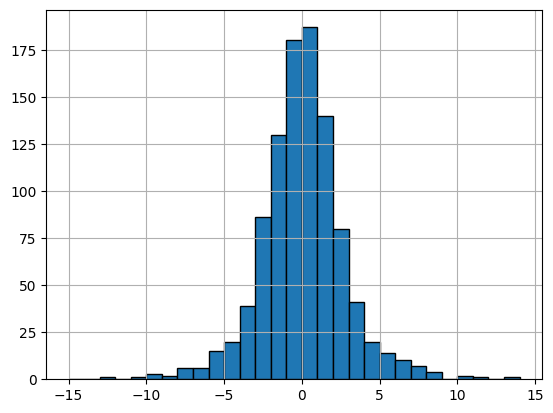

In [54]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [55]:
df.change_tomorrow.std()

3.351414873587701

We can say that 68% of the changes are between -3.5 and 3.5, approximately.

#### Change sign

Did the stock go up or down?

In [56]:
import numpy as np

In [57]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,-1
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,1
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,-1
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,1
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,-1
...,...,...,...,...,...,...,...
2023-12-13,461.980011,481.250000,461.980011,479.980011,479.980011,5820200,-1
2023-12-14,480.359985,480.760010,464.760010,469.829987,469.829987,5176400,1
2023-12-15,467.299988,473.000000,467.299988,472.059998,472.059998,7838300,1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [60]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [61]:
model.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=42)

In [62]:
model.score(X, y)

0.8228228228228228

## Backtesting

### Create the strategy

In [63]:
from backtesting import Strategy

In [64]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [65]:
from backtesting import Backtest

In [66]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [67]:
results = bt.run()

### Show the report in a DataFrame

In [68]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2020-01-02 00:00:00
End,2023-12-19 00:00:00
Duration,1447 days 00:00:00
Exposure Time [%],99.7998
Equity Final [$],24012622.171368
Equity Peak [$],24278923.926569
Return [%],240026.221714


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [69]:
bt.plot(filename='backtest_report.html')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fi

GridPlot(id='p1817', ...)

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)